<a href="https://colab.research.google.com/github/rg-smith/remote_sensing_course/blob/main/lectures/lecture10/time_series_analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/rg-smith/remote_sensing_course.git

Cloning into 'remote_sensing_course'...
remote: Enumerating objects: 469, done.
remote: Counting objects: 100% (246/246), done.
remote: Compressing objects: 100% (157/157), done.
remote: Total 469 (delta 64), reused 244 (delta 63), pack-reused 223
Receiving objects: 100% (469/469), 318.67 MiB | 21.42 MiB/s, done.
Resolving deltas: 100% (128/128), done.
Checking out files: 100% (109/109), done.


In [2]:
!pip install rasterio
!pip install geopandas

     |████████████████████████████████| 19.3 MB 1.4 MB/s 
     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 6.3 MB 40.4 MB/s 
     |████████████████████████████████| 16.7 MB 399 kB/s 


In [3]:
import rasterio
import matplotlib.pyplot as plt
import geopandas as gpd
from glob import glob
import numpy as np

First, we will get a list of all the rasters in the lecture10/rasters folder, and extract the dates from the filenames

In [5]:
files = glob('remote_sensing_course/lectures/lecture10/rasters/*.tif')
print(files)
fnames = list(f.split('/')[-1] for f in files)
dates = list(f.split('_')[1] for f in fnames)
dates_np = np.array(dates,dtype='datetime64')
print(dates_np)
print(len(dates_np))

['remote_sensing_course/lectures/lecture10/rasters/L1C_2018-09-28_S2B.tif', 'remote_sensing_course/lectures/lecture10/rasters/L1C_2018-06-02_S2A.tif', 'remote_sensing_course/lectures/lecture10/rasters/L1C_2018-05-11_S2B.tif', 'remote_sensing_course/lectures/lecture10/rasters/L1C_2018-07-07_S2B.tif', 'remote_sensing_course/lectures/lecture10/rasters/L1C_2018-05-31_S2B.tif', 'remote_sensing_course/lectures/lecture10/rasters/L1C_2018-09-15_S2B.tif', 'remote_sensing_course/lectures/lecture10/rasters/L1C_2018-08-01_S2A.tif', 'remote_sensing_course/lectures/lecture10/rasters/L1C_2018-09-20_S2A.tif', 'remote_sensing_course/lectures/lecture10/rasters/L1C_2018-08-26_S2B.tif', 'remote_sensing_course/lectures/lecture10/rasters/L1C_2018-08-16_S2B.tif', 'remote_sensing_course/lectures/lecture10/rasters/L1C_2018-08-31_S2A.tif', 'remote_sensing_course/lectures/lecture10/rasters/L1C_2018-05-26_S2A.tif', 'remote_sensing_course/lectures/lecture10/rasters/L1C_2018-04-01_S2B.tif', 'remote_sensing_course/l

In [15]:
ts = np.zeros(len(files))
ts_c = np.zeros(len(files))
for i, file in enumerate(files):
  r = rasterio.open(file)
  array = r.read(1)
  array_c = r.read(2)
  if i==0:
    array_mean = array
  else:
    array_mean = array_mean+array
  ts[i] = array[460,360]
  ts_c[i] = array_c[460,360]
array_mean = array_mean/len(files)


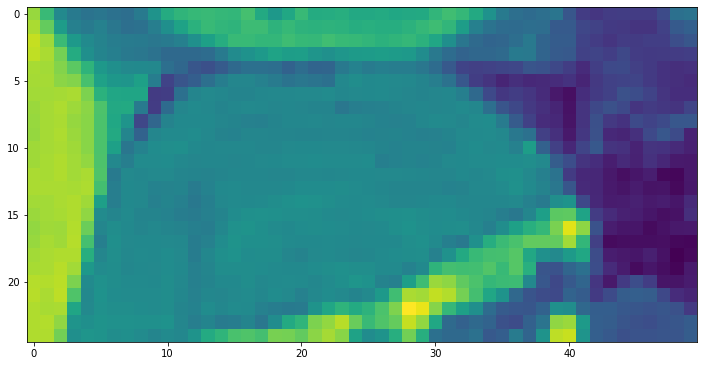

In [11]:
plt.figure(figsize=(12,12));plt.imshow(array_mean[450:475,340:390])

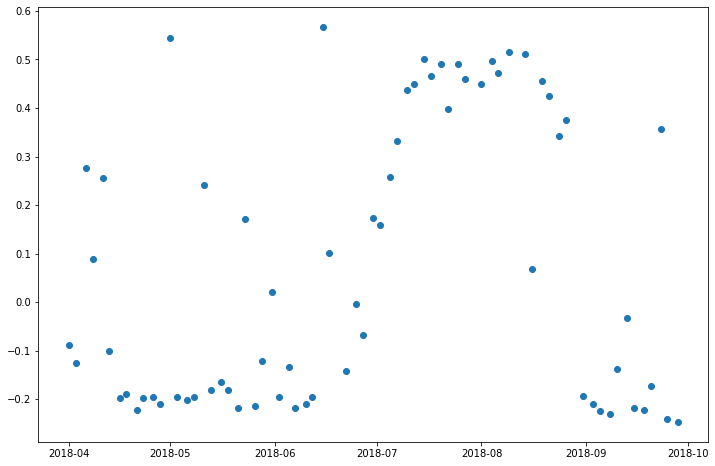

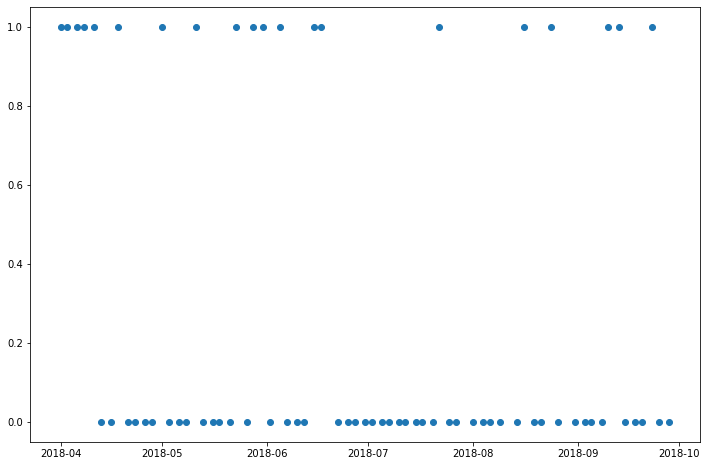

In [16]:
plt.figure(figsize=(12,8));plt.plot(dates_np,ts,'o')
plt.figure(figsize=(12,8));plt.plot(dates_np,ts_c,'o')

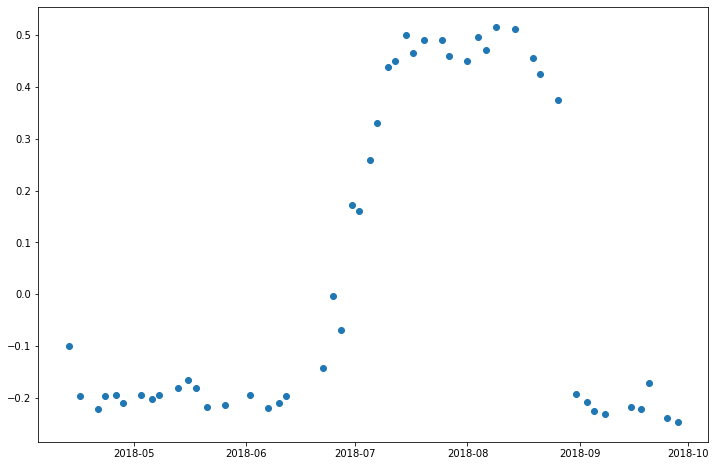

In [17]:
ts[ts_c==1] = np.nan
plt.figure(figsize=(12,8));plt.plot(dates_np,ts,'o')